<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/12-K-Nearest-Neighbors/12_My_K_Nearest_Neighbors_01_KNN_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Project Exercise

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [62]:
df = pd.read_csv('/content/sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
len(df)

208

## Data Exploration

<Axes: xlabel='Freq_1', ylabel='Freq_2'>

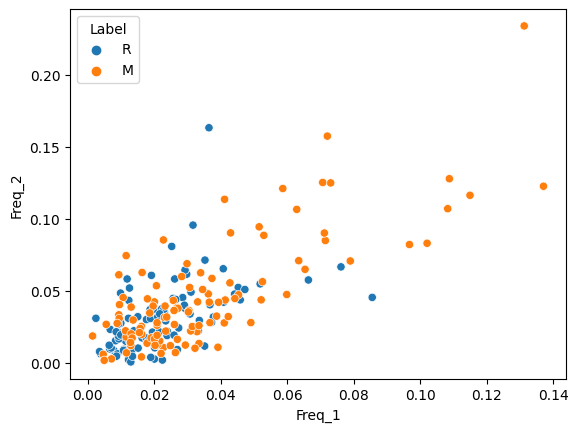

In [5]:
sns.scatterplot(x='Freq_1', y='Freq_2', data=df, hue='Label')

<ipython-input-6-2e153d1962ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

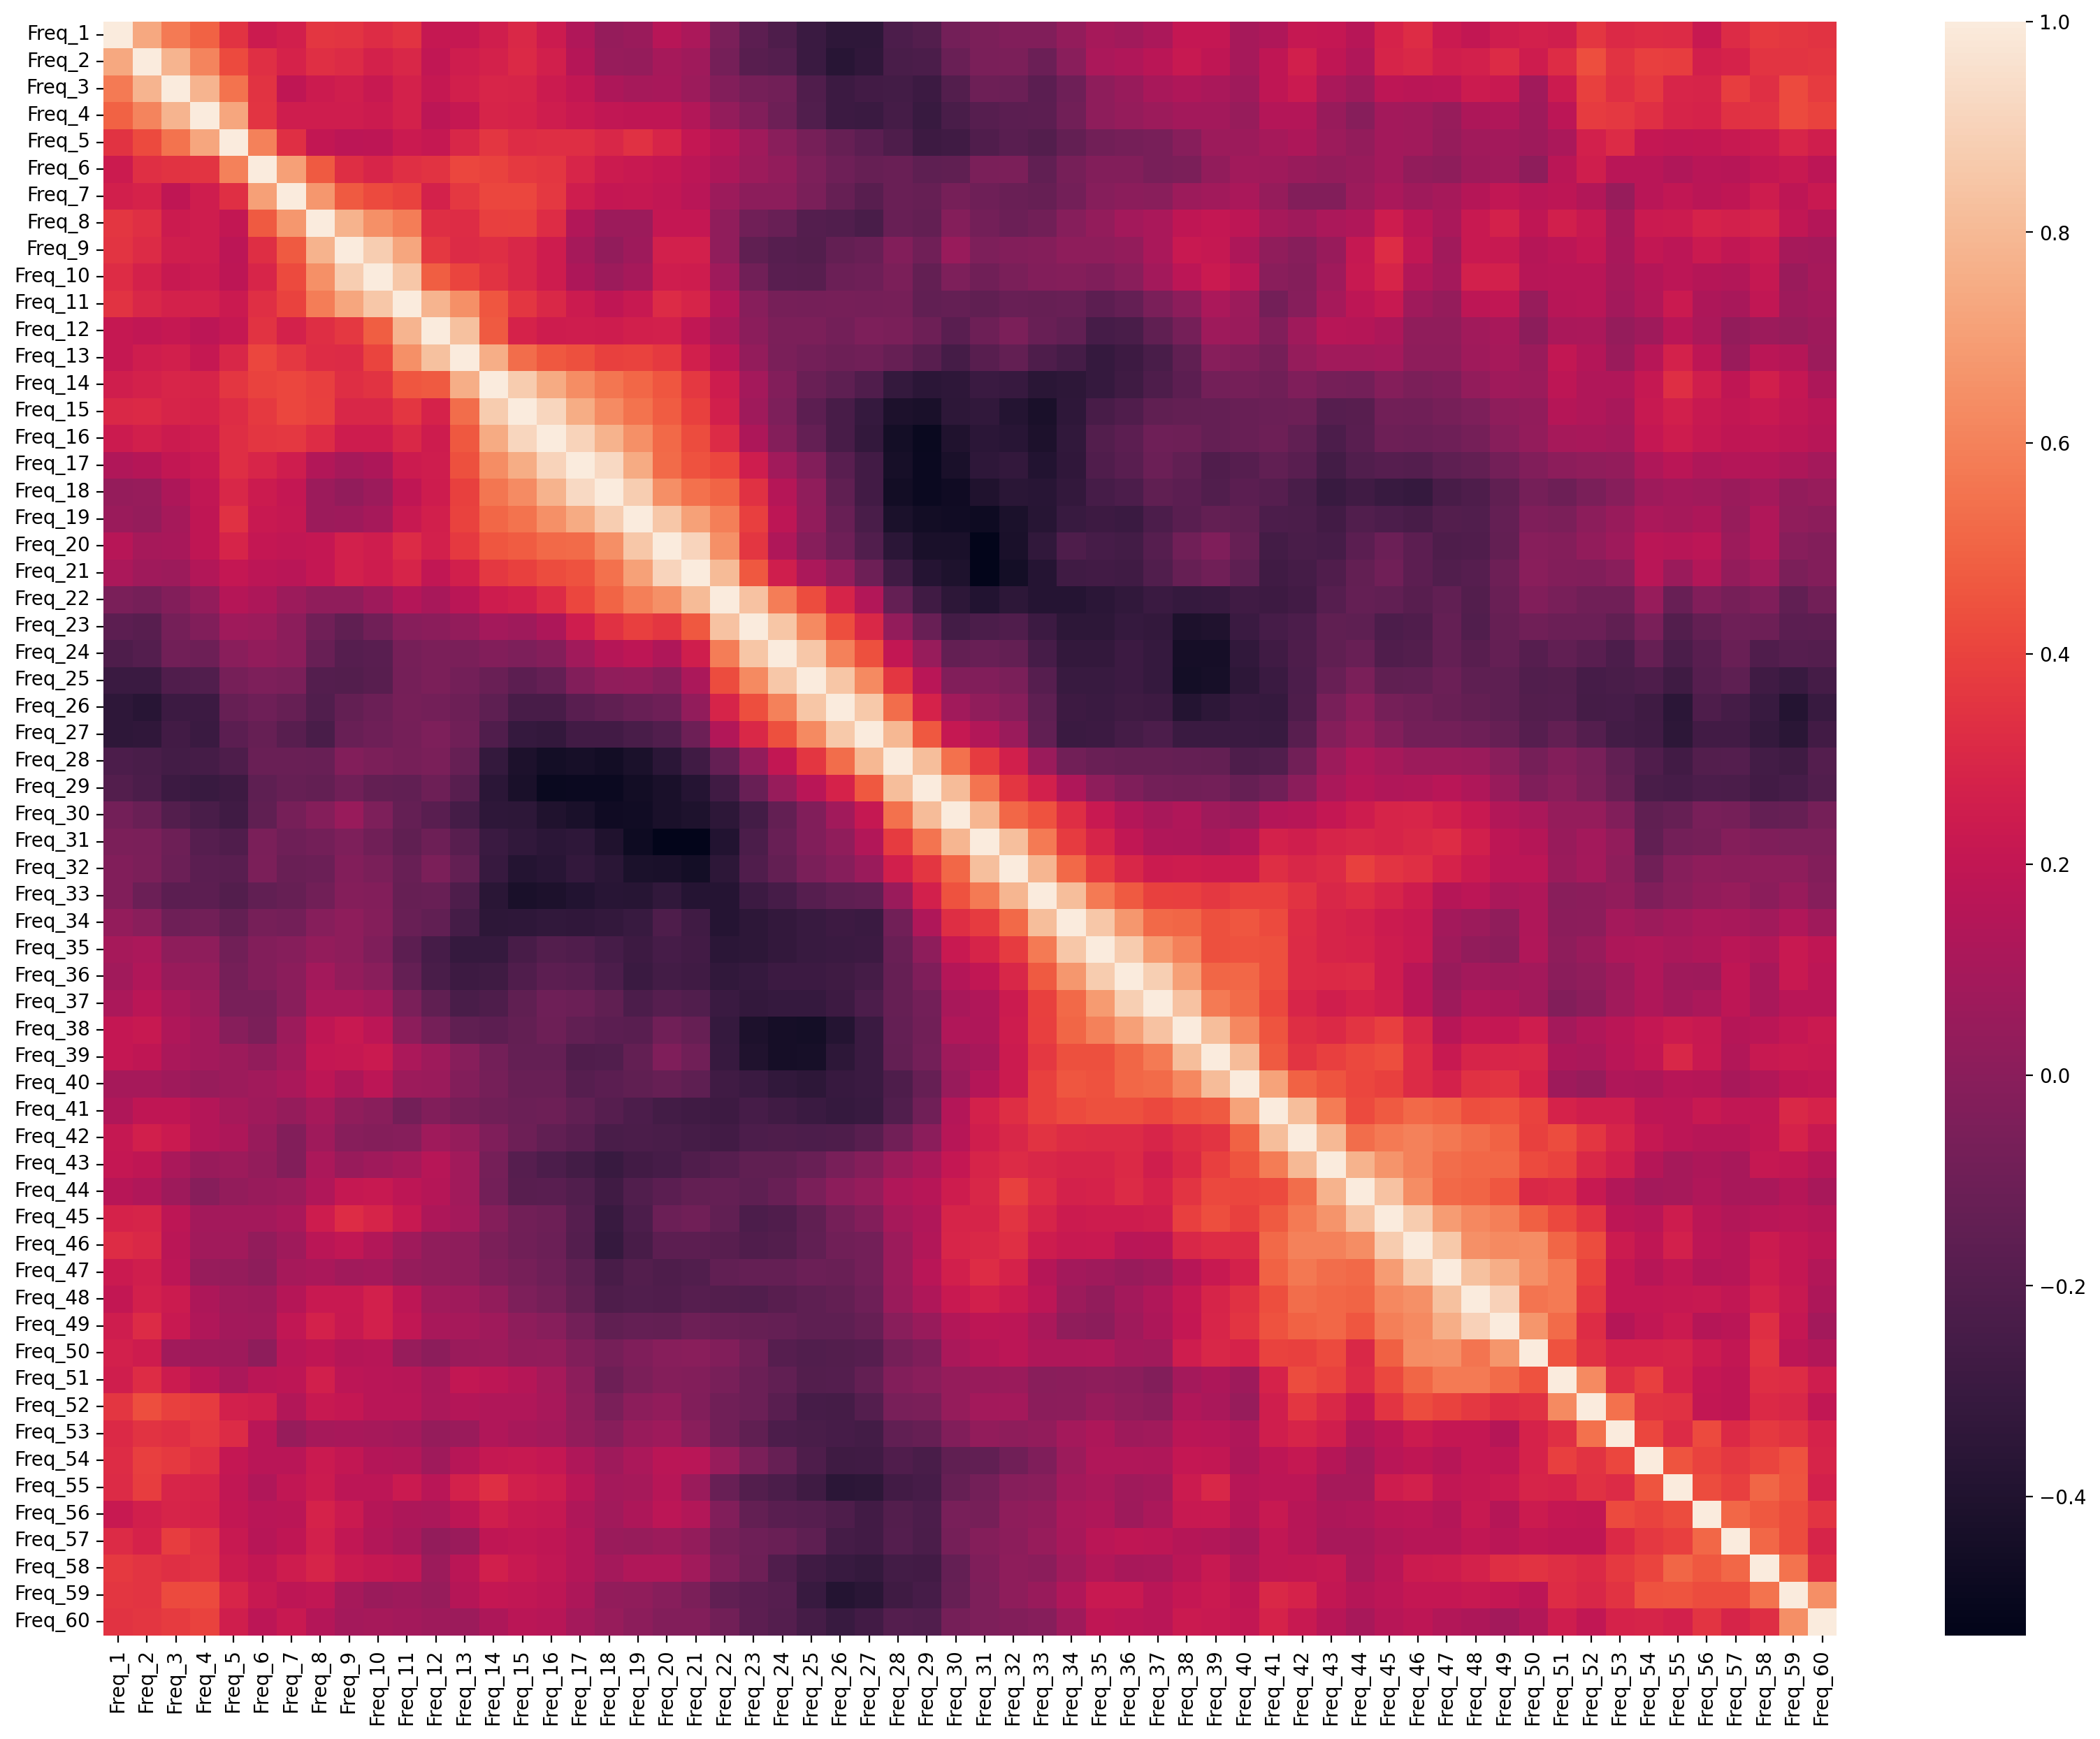

In [6]:
plt.figure(figsize=(20,15), dpi=200)
sns.heatmap(df.corr())

In [61]:
df['Label']

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Label, Length: 208, dtype: uint8

In [56]:
label = pd.get_dummies(df['Label'])
label

,M,R
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
203,1,0
204,1,0
205,1,0
206,1,0


In [58]:
label = pd.get_dummies(df['Label'], drop_first=True)
label

,R
0,1
1,1
2,1
3,1
4,1
...,...
203,0
204,0
205,0
206,0


In [59]:
df_mod = df
df_mod['Label'] = label

In [11]:
df_mod.corr()['Label']

Freq_1    -0.271694
Freq_2    -0.231238
Freq_3    -0.192195
Freq_4    -0.250638
Freq_5    -0.222232
             ...   
Freq_57   -0.000933
Freq_58   -0.184191
Freq_59   -0.130826
Freq_60   -0.090055
Label      1.000000
Name: Label, Length: 61, dtype: float64

In [12]:
df_mod.corr()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
Freq_1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,-0.271694
Freq_2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,-0.231238
Freq_3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,-0.192195
Freq_4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,-0.250638
Freq_5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,-0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Freq_57,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,...,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,-0.000933
Freq_58,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,-0.184191
Freq_59,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,-0.130826
Freq_60,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,-0.090055


In [13]:
df_mod.corr().iloc[45]

Freq_1     0.319354
Freq_2     0.304247
Freq_3     0.173649
Freq_4     0.080012
Freq_5     0.081964
             ...   
Freq_57    0.162125
Freq_58    0.237890
Freq_59    0.205291
Freq_60    0.180691
Label     -0.305610
Name: Freq_46, Length: 61, dtype: float64

In [15]:
abs(df_mod.corr()['Label']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, dtype: float64

## Train | Test Split

In [73]:
# SPLITTING THE DATA
X = df.drop('Label', axis=1)
y = df['Label']

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# CREATING A PIPLINE
transforms = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipe = Pipeline(transforms)
k_values = list(range(1,20))
param_grid = {'knn__n_neighbors': k_values}

# PERFORMING A GRIDSEARCH CV
classifier = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=10)
classifier.fit(X_train, y_train)



GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [74]:
classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [75]:
classifier.cv_results_

{'mean_fit_time': array([0.01045439, 0.00590219, 0.00593171, 0.00848775, 0.00690737,
        0.0127686 , 0.01396191, 0.00713015, 0.00754337, 0.00827062,
        0.00695033, 0.00500066, 0.00516286, 0.0049835 , 0.00484316,
        0.00565641, 0.00533741, 0.00493281, 0.00495434]),
 'std_fit_time': array([0.00455106, 0.00026861, 0.00062592, 0.00377071, 0.00323178,
        0.00386444, 0.00636448, 0.00130966, 0.00232564, 0.00137572,
        0.00267167, 0.00013136, 0.0006031 , 0.00024579, 0.00012694,
        0.0017602 , 0.00113229, 0.00014139, 0.00021472]),
 'mean_score_time': array([0.02802002, 0.00616896, 0.00576272, 0.02716613, 0.00581656,
        0.04721303, 0.0337842 , 0.01738353, 0.02458403, 0.05978847,
        0.01728785, 0.00384488, 0.00383606, 0.00426769, 0.00654566,
        0.00460024, 0.00411484, 0.00379913, 0.00394163]),
 'std_score_time': array([2.46991850e-02, 1.47064743e-03, 1.16793524e-03, 2.73471224e-02,
        6.71017866e-04, 2.25654372e-02, 3.42255664e-02, 2.34832150e-02,


In [95]:
classifier.cv_results_['mean_test_score']

array([0.86111111, 0.82923977, 0.81812865, 0.77017544, 0.78128655,
       0.78128655, 0.77602339, 0.75438596, 0.76023392, 0.73830409,
       0.71754386, 0.67368421, 0.70643275, 0.67397661, 0.71140351,
       0.68450292, 0.71169591, 0.69502924, 0.69532164])

Text(0, 0.5, 'Accuracy')

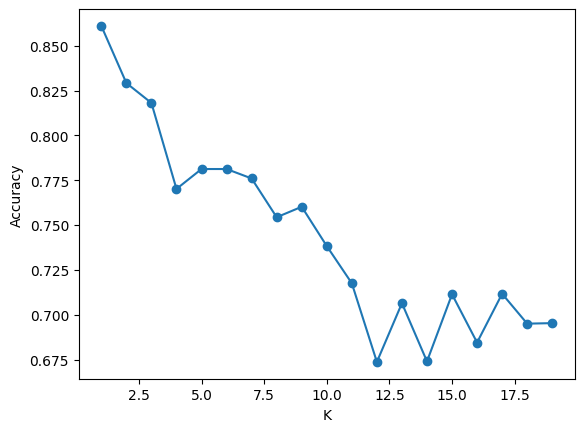

In [110]:
plt.plot(k_values, classifier.cv_results_['mean_test_score'], 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')

## Final Model Evaluation

In [76]:
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)
# help(ConfusionMatrixDisplay.from_predictions)

array([[12,  1],
       [ 1,  7]])

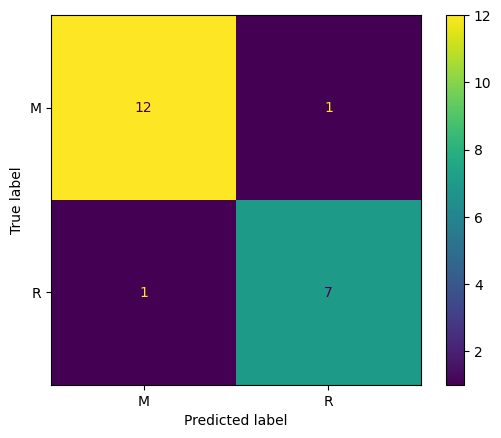

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [67]:
len(X_test)

21

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [79]:
y_pred

array(['M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M',
       'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M'], dtype=object)

In [80]:
y_train

170    M
104    M
101    M
69     R
25     R
      ..
106    M
14     R
92     R
179    M
102    M
Name: Label, Length: 187, dtype: object

In [81]:
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: Label, Length: 208, dtype: object

In [82]:
df['Label']

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: Label, Length: 208, dtype: object

In [54]:
df

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
